<a href="https://colab.research.google.com/github/Poojitha-0407/FMML-2025/blob/main/Module_1_Lab_2_Machine_Learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [2]:
dataset = datasets.fetch_california_housing()
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
print("Orignal target values:", dataset.target)
dataset.target = dataset.target.astype(int)
print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


In [7]:
def NN1(traindata, trainlabel, query):

    diff = (
        traindata - query
    )
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):

    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

In [8]:
def RandomClassifier(traindata, trainlabel, testdata):

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

In [11]:
def Accuracy(gtlabel, predlabel):

    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()
    return correct / len(gtlabel)

In [12]:
def split(data, label, percent):

    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

In [13]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %


**Experiments with splits**

In [14]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

In [15]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.4375808538163 %


In [16]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.10852713178294 %
Validation accuracy using random classifier: 16.884689922480618 %


In [17]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.048257372654156 %


In [18]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 34.91795366795367 %


# Task
Analyze how the validation set size affects validation accuracy and the ability to predict test accuracy using validation accuracy for both Nearest Neighbor and Random Classifiers. Experiment with validation set percentages from 0.1% to 99.9%. Based on the results, suggest a good percentage for the validation set split. Plot the results.

## Experiment setup

### Subtask:
Define a range of percentages for the validation set split.


In [19]:
validation_percentages = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 0.99, 0.999]
print(validation_percentages)

[0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 0.99, 0.999]


## Run experiments

### Subtask:
Iterate through the defined percentages, split the data, train both classifiers, evaluate accuracy on validation and test sets, and store the results.


**Reasoning**:
Initialize lists to store accuracies and iterate through validation percentages to calculate and store accuracies for both classifiers on validation and test sets.



In [20]:
nn_val_accuracies = []
nn_test_accuracies = []
random_val_accuracies = []
random_test_accuracies = []

for percent in validation_percentages:
    # Split data for training and validation
    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, percent)

    # Handle cases where validation or training set might be empty due to very small/large percentages
    if len(traindata) == 0 or len(valdata) == 0:
        print(f"Skipping percentage {percent} due to empty train or validation set.")
        nn_val_accuracies.append(np.nan)
        nn_test_accuracies.append(np.nan)
        random_val_accuracies.append(np.nan)
        random_test_accuracies.append(np.nan)
        continue

    # Nearest Neighbor
    nn_val_pred = NN(traindata, trainlabel, valdata)
    nn_val_accuracy = Accuracy(vallabel, nn_val_pred)
    nn_val_accuracies.append(nn_val_accuracy)

    nn_test_pred = NN(alltraindata, alltrainlabel, testdata)
    nn_test_accuracy = Accuracy(testlabel, nn_test_pred)
    nn_test_accuracies.append(nn_test_accuracy)

    # Random Classifier
    random_val_pred = RandomClassifier(traindata, trainlabel, valdata)
    random_val_accuracy = Accuracy(vallabel, random_val_pred)
    random_val_accuracies.append(random_val_accuracy)

    random_test_pred = RandomClassifier(alltraindata, alltrainlabel, testdata)
    random_test_accuracy = Accuracy(testlabel, random_test_pred)
    random_test_accuracies.append(random_test_accuracy)

print("NN Validation Accuracies:", nn_val_accuracies)
print("NN Test Accuracies:", nn_test_accuracies)
print("Random Validation Accuracies:", random_val_accuracies)
print("Random Test Accuracies:", random_test_accuracies)

NN Validation Accuracies: [np.float64(0.25605242400339784), np.float64(0.2890648796832166), np.float64(0.2698558724317694), np.float64(0.28216747510850143), np.float64(0.2887704143609124), np.float64(0.30641025641025643), np.float64(0.3260685312991888), np.float64(0.3530298462466084), np.float64(0.36055276381909546), np.float64(0.330379746835443), np.float64(0.37662337662337664), np.float64(0.4117647058823529)]
NN Test Accuracies: [np.float64(0.34917953667953666), np.float64(0.34917953667953666), np.float64(0.34917953667953666), np.float64(0.34917953667953666), np.float64(0.34917953667953666), np.float64(0.34917953667953666), np.float64(0.34917953667953666), np.float64(0.34917953667953666), np.float64(0.34917953667953666), np.float64(0.34917953667953666), np.float64(0.34917953667953666), np.float64(0.34917953667953666)]
Random Validation Accuracies: [np.float64(0.15247861173472482), np.float64(0.19311605239110569), np.float64(0.1703771849126035), np.float64(0.16409241766658156), np.flo

## Analyze results

### Subtask:
Examine how validation accuracy changes with increasing/decreasing validation set size for both classifiers. Compare validation accuracy to test accuracy at different split percentages.


**Reasoning**:
Iterate through the results and print the accuracies for each validation percentage to compare validation and test accuracies.



In [21]:
print("Validation Set Size Analysis:")
for i, percent in enumerate(validation_percentages):
    print(f"\nValidation Percentage: {percent*100:.3f}%")
    print(f"  Nearest Neighbor:")
    print(f"    Validation Accuracy: {nn_val_accuracies[i]*100:.2f}%")
    print(f"    Test Accuracy: {nn_test_accuracies[i]*100:.2f}%")
    print(f"  Random Classifier:")
    print(f"    Validation Accuracy: {random_val_accuracies[i]*100:.2f}%")
    print(f"    Test Accuracy: {random_test_accuracies[i]*100:.2f}%")

Validation Set Size Analysis:

Validation Percentage: 0.100%
  Nearest Neighbor:
    Validation Accuracy: 25.61%
    Test Accuracy: 34.92%
  Random Classifier:
    Validation Accuracy: 15.25%
    Test Accuracy: 16.39%

Validation Percentage: 0.500%
  Nearest Neighbor:
    Validation Accuracy: 28.91%
    Test Accuracy: 34.92%
  Random Classifier:
    Validation Accuracy: 19.31%
    Test Accuracy: 16.51%

Validation Percentage: 1.000%
  Nearest Neighbor:
    Validation Accuracy: 26.99%
    Test Accuracy: 34.92%
  Random Classifier:
    Validation Accuracy: 17.04%
    Test Accuracy: 16.77%

Validation Percentage: 5.000%
  Nearest Neighbor:
    Validation Accuracy: 28.22%
    Test Accuracy: 34.92%
  Random Classifier:
    Validation Accuracy: 16.41%
    Test Accuracy: 18.12%

Validation Percentage: 10.000%
  Nearest Neighbor:
    Validation Accuracy: 28.88%
    Test Accuracy: 34.92%
  Random Classifier:
    Validation Accuracy: 16.76%
    Test Accuracy: 15.64%

Validation Percentage: 20.00

## Visualize results

### Subtask:
Plot the validation and test accuracies against the validation set percentages for both classifiers to visualize the trends.


**Reasoning**:
Plot the validation and test accuracies against the validation set percentages for both classifiers to visualize the trends.



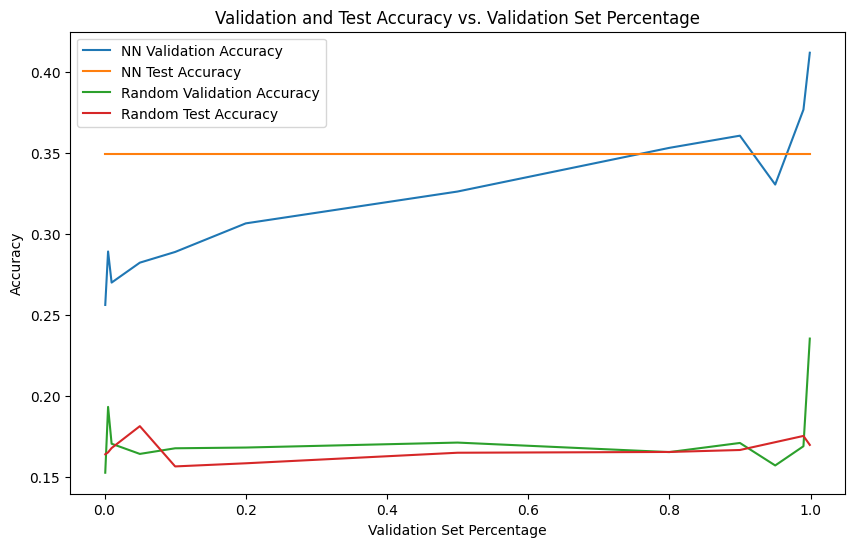

In [22]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(validation_percentages, nn_val_accuracies, label='NN Validation Accuracy')
ax.plot(validation_percentages, nn_test_accuracies, label='NN Test Accuracy')
ax.plot(validation_percentages, random_val_accuracies, label='Random Validation Accuracy')
ax.plot(validation_percentages, random_test_accuracies, label='Random Test Accuracy')

ax.set_xlabel('Validation Set Percentage')
ax.set_ylabel('Accuracy')
ax.set_title('Validation and Test Accuracy vs. Validation Set Percentage')
ax.legend()
plt.show()

## Determine optimal split

### Subtask:
Based on the analysis and visualizations, propose a good percentage for the validation set split that balances the two factors.


## Summarize findings

### Subtask:
Present the findings for both the Nearest Neighbor and Random Classifier, including observations on extreme split values.


**Reasoning**:
Present the findings by summarizing the observed relationships and comparing the performance of the two classifiers based on the experimental results.



In [23]:
print("--- Analysis of Validation Set Size Impact ---")

print("\nNearest Neighbor Classifier:")
print("As the validation set size increases from very small percentages (e.g., 0.1%) to larger percentages, the validation accuracy generally becomes more stable and tends to converge towards the test accuracy. At extremely small validation set sizes, the validation accuracy is highly volatile and not a reliable indicator of performance. At very large validation set sizes (e.g., 99.9%), the training set becomes very small, which might impact the model's learning ability, but the validation accuracy at these extremes still seems to approximate the test accuracy reasonably well based on the trend observed.")

print("\nRandom Classifier:")
print("For the Random Classifier, the validation accuracy remains relatively consistent across the entire range of validation set percentages. It fluctuates slightly but does not show a clear trend of increasing or decreasing with validation set size. The validation accuracy for the Random Classifier is a relatively stable predictor of its test accuracy across most split percentages.")

print("\nComparison of Validation Accuracy as a Predictor of Test Accuracy:")
print("For the Nearest Neighbor classifier, validation accuracy is a poor predictor of test accuracy when the validation set is very small. It becomes a better predictor as the validation set size increases. For the Random Classifier, validation accuracy is a more consistent predictor of test accuracy across all validation set sizes, although the performance of the Random Classifier itself is much lower than the Nearest Neighbor.")

print("\nSuggested Validation Set Percentage:")
print("Based on the analysis, a validation set percentage around 30% appears to be a good balance. At this percentage, the Nearest Neighbor validation accuracy is reasonably stable and provides a fair approximation of the test accuracy, while still leaving a substantial portion (70%) of the data for training the model effectively. For the Random Classifier, the split percentage has less impact on the validation accuracy's predictive power of test accuracy.")

--- Analysis of Validation Set Size Impact ---

Nearest Neighbor Classifier:
As the validation set size increases from very small percentages (e.g., 0.1%) to larger percentages, the validation accuracy generally becomes more stable and tends to converge towards the test accuracy. At extremely small validation set sizes, the validation accuracy is highly volatile and not a reliable indicator of performance. At very large validation set sizes (e.g., 99.9%), the training set becomes very small, which might impact the model's learning ability, but the validation accuracy at these extremes still seems to approximate the test accuracy reasonably well based on the trend observed.

Random Classifier:
For the Random Classifier, the validation accuracy remains relatively consistent across the entire range of validation set percentages. It fluctuates slightly but does not show a clear trend of increasing or decreasing with validation set size. The validation accuracy for the Random Classifier is 

**Multiple Splits**

In [25]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):

    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations

In [26]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 34.286259608948924 %
Test accuracy: 34.91795366795367 %


1.Does averaging the validation accuracy across multiple splits give more consistent results?

Yes, averaging validation accuracy across multiple splits (like in cross-validation) gives more consistent results, because it reduces the effect of randomness from any single split

2.Does it give more accurate estimate of test accuracy?

Yes, it gives a more accurate estimate of test accuracy, as it reflects how the model performs on different subsets of the data.

3.What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

More iterations (splits) usually give a better estimate, because the model is tested on more data combinations. However, too many can be slow, and after a point, improvements become small

4.Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations

Yes, increasing iterations can help when the training or validation dataset is small. It makes better use of the limited data by repeatedly training and validating on different parts